In [1]:
import pandas as pd
import geopandas
import contextily as cx

gdf = geopandas.read_file("C:\\Users\\phili\\Downloads\\seoul_municipalities.shp")

df = pd.DataFrame({'longitude': [127, 127.1, 126.8], 'latitude': [37.5, 37.5, 37.5], 'z': [0, 1, 2]})
gdf2 = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude, crs="EPSG:4326"))

C:\ProgramData\Miniconda3\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


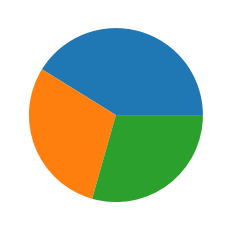

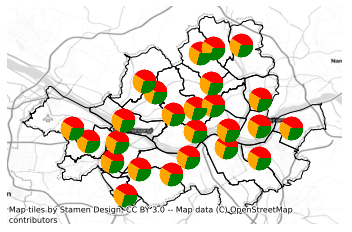

In [65]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25])
wedges = plt.pie(y)

fig, ax = plt.subplots()
ax.set_aspect('equal')

gdf.plot(ax=ax, facecolor="none", edgecolor='k',linewidth = 1)
#plt
piecolor=['r','orange','g']
for j in range(3):
    gdf2.plot(ax=ax, marker=(wedges[0][j].get_path().vertices.tolist()),facecolor=piecolor[j], markersize=500)
#plt2 = gdf2.plot(ax=ax)
cx.add_basemap(ax, crs=gdf2.crs.to_string(), zoom=11, source=cx.providers.Stamen.TonerLite)
ax.set_axis_off()
plt.show()

In [ ]:
import pandas as pd
df = pd.DataFrame({'x': [0, 1, 2], 'y': [0, 1, 2], 'z': [0, 1, 2]})
df

geometry = geopandas.points_from_xy(df['x'], df['y'], df['z'])
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['x'], df['y']))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])

plt.pie(y)
plt.plot(ax = plt)

C:\ProgramData\Miniconda3\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


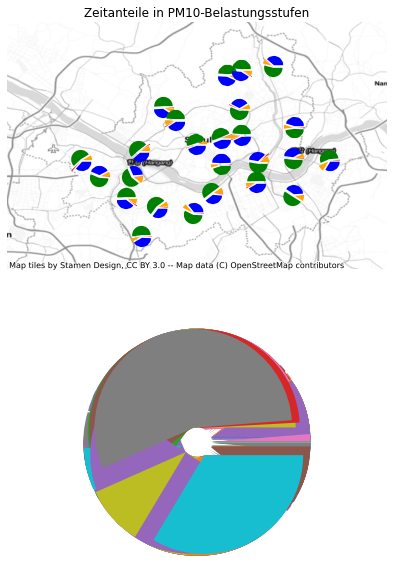

In [5]:
import pandas as pd
import geopandas
import contextily as cx
import matplotlib.pyplot as plt
import numpy as np


gdf = geopandas.read_file("C:\\Users\\phili\\Downloads\\seoul_municipalities.shp")

stationsDF = pd.read_csv("C:\\Users\\phili\\Desktop\\BigData\\PM10_cleaned.csv", names = ['station', 'latitude', 'longitude','PM10_quality','percentage'])
stationsDF = stationsDF.sort_values(by='station')
gdf2 = geopandas.GeoDataFrame(stationsDF, geometry=geopandas.points_from_xy(stationsDF.longitude, stationsDF.latitude, crs="EPSG:4326"))

fig, axes = plt.subplots(2,1, figsize=(10,10))
ax = axes[0]
pieAx = axes[1]
ax.set_aspect('equal')

gdf.plot(ax=ax, facecolor="none", edgecolor='none',linewidth = 1, figsize=(200,200))

i = 0
wedges = {}
count = stationsDF['percentage'].count()
while i < count:
    current_station = stationsDF.iloc[i].station
    percentages = []
    while i < count and stationsDF.iloc[i].station == current_station:
        percentages.append(stationsDF.iloc[i].percentage)
        i+=1
        
    e = []
    for p in percentages:
        e.append(0.15)
    wedges[i] = pieAx.pie(np.array(percentages), explode=e)
    
    
piecolor=['b','g','orange','r']
i = 0;
count = stationsDF['percentage'].count()
while i < count:
    current_station = stationsDF.iloc[i].station
    percentages = []
    levels = []
    while i < count and stationsDF.iloc[i].station == current_station:
        levels.append(stationsDF.iloc[i].PM10_quality)
        percentages.append(stationsDF.iloc[i].percentage)
        i+=1
    
    row = gdf2.iloc[i-1]
    for j in range(len(wedges[i][0])):
        color = piecolor[levels[j]]
        ax.scatter([row.longitude],[row.latitude],marker=(wedges[i][0][j].get_path().vertices.tolist()),facecolor=color, linewidths=0.0, s=450)
        
cx.add_basemap(ax, crs=gdf2.crs.to_string(), zoom=11, source=cx.providers.Stamen.TonerLite)
ax.set_axis_off()

ax.set_title("Zeitanteile in PM10-Belastungsstufen")
plt.show()
#fig.savefig("map_export.png", dpi=100)

C:\ProgramData\Miniconda3\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


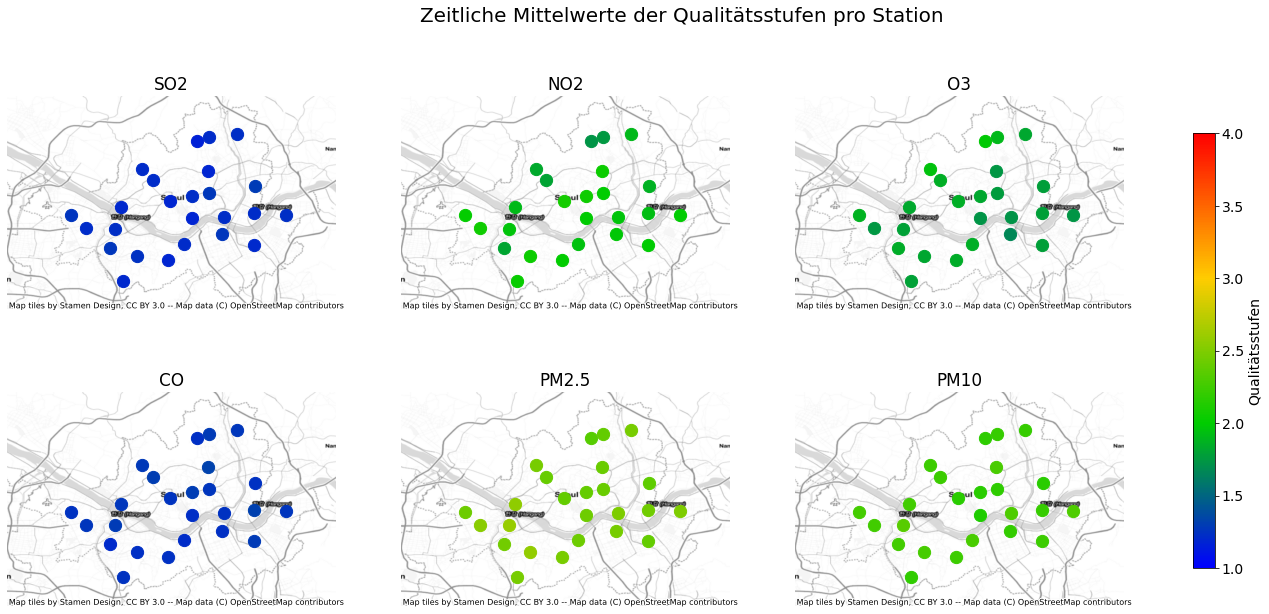

In [76]:
import pandas as pd
import geopandas
import contextily as cx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mplot

def q_level_color(item_name, value):
    q_dict = {'SO2': [0.02, 0.05, 0.15, 1.0], 'NO2': [0.03, 0.06, 0.2, 2.0], 'CO': [2.0, 9.0, 15.0, 50.0], 'O3': [0.03, 0.09, 0.15, 0.5], 'PM10': [30.0, 80.0, 150.0, 600.0], 'PM2_5': [15.0, 35.0, 75.0, 500.0]}
    colors = [(0.0, 0.0, 1.0),(0.0, 0.8, 0.0),(1.0, 0.8, 0.0),(1.0, 0.0, 0.0)]
    levels = q_dict[item_name]
    for i in range(0, len(levels)):
        if value < levels[i]:
            # found the matching quality level
            start_color = colors[i]
            next_color = colors[0]
            if i != len(levels) - 1:
                next_color = colors[i+1]
            else:
                next_color = colors[i]
            # interpolate the colors
            start_val = 0.0
            if i!=0:
                start_val = levels[i-1]
            next_val = levels[i]
            total_diff = next_val - start_val
            diff = next_val - value
            this_factor = diff / total_diff
            final_color = (start_color[0]*this_factor + next_color[0]*(1.0-this_factor), \
                           start_color[1]*this_factor + next_color[1]*(1.0-this_factor), \
                           start_color[2]*this_factor + next_color[2]*(1.0-this_factor),)
            return final_color

gdf = geopandas.read_file("C:\\Users\\phili\\Downloads\\seoul_municipalities.shp")

stationsDF = pd.read_csv("C:\\Users\\phili\\Desktop\\BigData\\stationAveragesCleaned.csv", names = [ 'station', 'latitude', 'longitude', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2_5'])
#stationsDF = stationsDF.sort_values(by='station') # unneccesary as there is only one row per station
gdf2 = geopandas.GeoDataFrame(stationsDF, geometry=geopandas.points_from_xy(stationsDF.longitude, stationsDF.latitude, crs="EPSG:4326"))

plt.rc('font', size=14) #controls default text size

fig, axes = plt.subplots(2,3, figsize=(25,10))

for a in axes:
    for ax in a:
        ax.set_aspect('equal')
        gdf.plot(ax=ax, facecolor="none", edgecolor='none',linewidth = 1)

#######
# SO2 #
#######
axes[0][0].set_title("SO2")
i = 0;
count = stationsDF['station'].count()
while i < count:
    current_station = stationsDF.iloc[i].station
    
    row = gdf2.iloc[i-1]
    axes[0][0].scatter([row.longitude],[row.latitude], facecolor=q_level_color("SO2",row.SO2), s=150)
    i = i+1
    
#######
# NO2 #
#######
axes[0][1].set_title("NO2")
i = 0;
count = stationsDF['station'].count()
while i < count:
    current_station = stationsDF.iloc[i].station
    
    row = gdf2.iloc[i-1]
    axes[0][1].scatter([row.longitude],[row.latitude], facecolor=q_level_color("NO2",row.NO2), s=150)
    i = i+1
    
######
# O3 #
######
axes[0][2].set_title("O3")
i = 0;
count = stationsDF['station'].count()
while i < count:
    current_station = stationsDF.iloc[i].station
    
    row = gdf2.iloc[i-1]
    axes[0][2].scatter([row.longitude],[row.latitude], facecolor=q_level_color("O3",row.O3), s=150)
    i = i+1
    
######
# CO #
######
axes[1][0].set_title("CO")
i = 0;
count = stationsDF['station'].count()
while i < count:
    current_station = stationsDF.iloc[i].station
    
    row = gdf2.iloc[i-1]
    axes[1][0].scatter([row.longitude],[row.latitude], facecolor=q_level_color("CO",row.CO), s=150)
    i = i+1
    
#########
# PM2_5 #
#########
axes[1][1].set_title("PM2.5")
i = 0;
count = stationsDF['station'].count()
while i < count:
    current_station = stationsDF.iloc[i].station
    
    row = gdf2.iloc[i-1]
    axes[1][1].scatter([row.longitude],[row.latitude], facecolor=q_level_color("PM2_5",row.PM2_5), s=150)
    i = i+1
    
########
# PM10 #
########
axes[1][2].set_title("PM10")
i = 0;
count = stationsDF['station'].count()
while i < count:
    current_station = stationsDF.iloc[i].station
    
    row = gdf2.iloc[i-1]
    axes[1][2].scatter([row.longitude],[row.latitude], facecolor=q_level_color("PM10",row.PM10), s=150)
    i = i+1

for a in axes:
    for ax in a:
        cx.add_basemap(ax, crs=gdf2.crs.to_string(), zoom=11, source=cx.providers.Stamen.TonerLite)
        ax.set_axis_off()

colors = [(0.0, 0.0, 1.0),(0.0, 0.8, 0.0),(1.0, 0.8, 0.0),(1.0, 0.0, 0.0)]
colormap = mplot.colors.LinearSegmentedColormap.from_list("quality levels", colors, N=256)

bounds = [1, 2, 3, 4]
norm = mplot.colors.Normalize(1.0,4.0)
sm = mplot.cm.ScalarMappable(cmap=colormap, norm=norm)
sm._A = []
fig.colorbar(
    sm,
    #boundaries= bounds,  # Adding values for extensions.
    label='Qualitätsstufen',
    ax=axes[:, :],
    shrink=0.8,
)

fig.suptitle('Zeitliche Mittelwerte der Qualitätsstufen pro Station', fontsize=20)

#ax.set_title("Mittlere NO2-Belastungen in Qualitätsstufen")
plt.show()
#fig.savefig("map_export.png", dpi=100)